In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
dataframe = pd.read_csv("heart.csv")
dataframe.head(10).style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.400000,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.300000,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.000000,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.500000,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.600000,2,0,2,1


In [12]:
print('Shape of Heart dataset is :',dataframe.shape)
print('Size of Heart dataset is  :',dataframe.size)

Shape of Heart dataset is : (303, 14)
Size of Heart dataset is  : 4242


In [13]:
dataframe.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [14]:
# Drop if there are duplicates rows.
dataframe = dataframe.drop_duplicates()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [15]:
dataframe.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

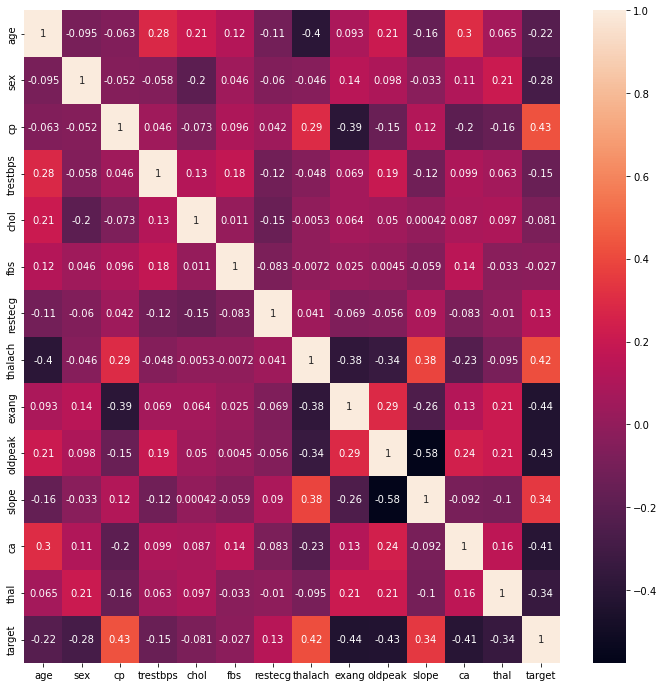

In [18]:
plt.figure(figsize=(12,12))
corrmat=dataframe.corr()
sns.heatmap(corrmat, annot=True)

In [22]:
# show how many columns has 0 values and sum it

featureList = ['cp', 'oldpeak','slope','fbs','restecg','exang']
print(dataframe[featureList].isin({0}).sum())

cp         143
oldpeak     98
slope       21
fbs        257
restecg    147
exang      203
dtype: int64


In [ ]:
dataframe['cp']=dataframe['cp'].replace(0,dataframe['cp'].mean())#normal distribution
dataframe['oldpeak']=dataframe['oldpeak'].replace(0,dataframe['oldpeak'].mean())#normal distribution
dataframe['slope']=dataframe['slope'].replace(0,dataframe['slope'].median())#skewed distribution
dataframe['fbs']=dataframe['fbs'].replace(0,dataframe['fbs'].mean())#normal distribution
dataframe['restecg']=dataframe['restecg'].replace(0,dataframe['restecg'].median())#skewed distribution
dataframe['exang']=dataframe['exang'].replace(0,dataframe['exang'].mean())#normal distribution

In [35]:
featureList = ['cp', 'oldpeak','slope','fbs','restecg','exang']
print(dataframe[featureList].isin({0}).sum())

cp         0
oldpeak    0
slope      0
fbs        0
restecg    0
exang      0
dtype: int64


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

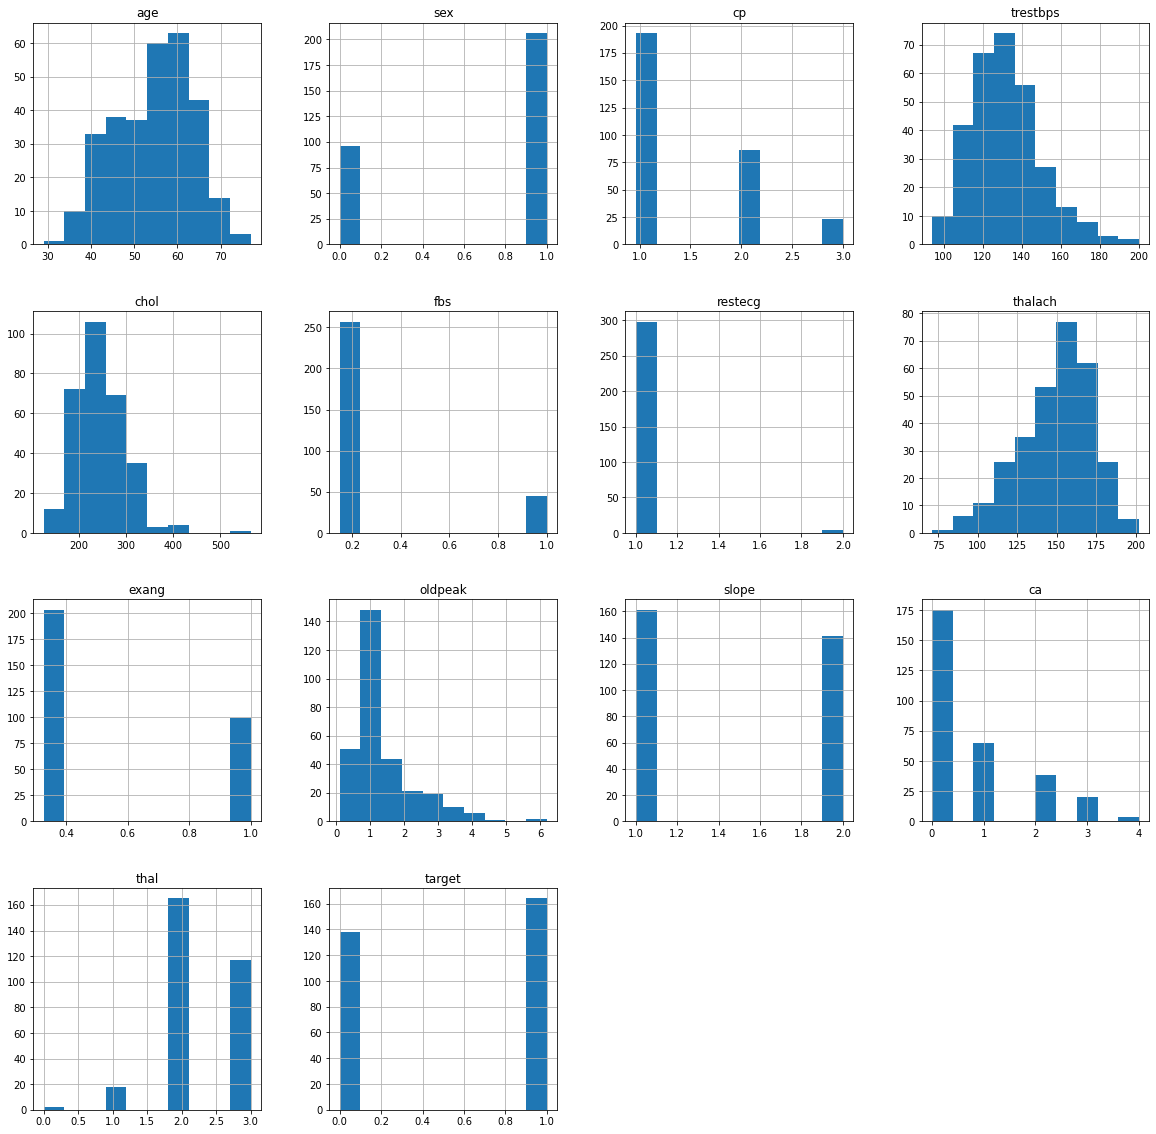

In [36]:
dataframe.hist(figsize = (20,20))

In [37]:
# Feature Selection
df_selected=dataframe.copy(deep=True)

# Handling Outliers

# Quantile Transformer 
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['age', 'sex', 'cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
df_new.head()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (302). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.817276,1.0,1.000000,0.810631,0.426910,1.0,0.0,0.448505,0.0,0.855482,0.0,0.0,0.034884,1.0
1,0.024917,1.0,0.782392,0.506645,0.578073,0.0,0.0,0.980066,0.0,0.956811,0.0,0.0,0.338870,1.0
2,0.074751,0.0,0.556478,0.506645,0.194352,0.0,0.0,0.838870,0.0,0.681063,1.0,0.0,0.338870,1.0
3,0.516611,1.0,0.556478,0.259136,0.465116,0.0,0.0,0.910299,0.0,0.189369,1.0,0.0,0.338870,1.0
4,0.564784,0.0,0.000000,0.259136,0.980066,0.0,0.0,0.705980,1.0,0.141196,1.0,0.0,0.338870,1.0


In [42]:
X = df_new.drop(columns='restecg', axis=1)
Y = df_new['restecg']
X.head() # independent features

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target
0,0.817276,1.0,1.000000,0.810631,0.426910,1.0,0.448505,0.0,0.855482,0.0,0.0,0.034884,1.0
1,0.024917,1.0,0.782392,0.506645,0.578073,0.0,0.980066,0.0,0.956811,0.0,0.0,0.338870,1.0
2,0.074751,0.0,0.556478,0.506645,0.194352,0.0,0.838870,0.0,0.681063,1.0,0.0,0.338870,1.0
3,0.516611,1.0,0.556478,0.259136,0.465116,0.0,0.910299,0.0,0.189369,1.0,0.0,0.338870,1.0
4,0.564784,0.0,0.000000,0.259136,0.980066,0.0,0.705980,1.0,0.141196,1.0,0.0,0.338870,1.0


In [44]:
Y.tail()

297    0.0
298    0.0
299    1.0
300    0.0
301    0.0
Name: fbs, dtype: float64

# Train and Split

In [45]:
from sklearn.model_selection import train_test_split
 # Splittingin the ratio of 60% for train, 40% for test.
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.3,random_state=12) 
X_train.shape, y_train.shape

((211, 13), (211,))

In [46]:
X_test.shape, y_test.shape

((91, 13), (91,))

# Logistic Regression

In [47]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()
logic.fit(X_train, y_train)
y_pred_lr = logic.predict(X_test)

log_train = round(logic.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 88.15 %
Model Accuracy Score : 78.02 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88        71
         1.0       0.00      0.00      0.00        20

    accuracy                           0.78        91
   macro avg       0.39      0.50      0.44        91
weighted avg       0.61      0.78      0.68        91

--------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Support Vector Machine

In [48]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 88.15 %
Model Accuracy Score : 78.02 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88        71
         1.0       0.00      0.00      0.00        20

    accuracy                           0.78        91
   macro avg       0.39      0.50      0.44        91
weighted avg       0.61      0.78      0.68        91

--------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 100.0 %
Model Accuracy Score : 70.33 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.79      0.85      0.82        71
         1.0       0.27      0.20      0.23        20

    accuracy                           0.70        91
   macro avg       0.53      0.52      0.52        91
weighted avg       0.67      0.70      0.69        91

--------------------------------------------------------


# K-Nearest Neighbour

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)

print("Training Accuracy    :",knn_train ,"%")
print("Model Accuracy Score :",knn_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 89.1 %
Model Accuracy Score : 76.92 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.80      0.94      0.86        71
         1.0       0.43      0.15      0.22        20

    accuracy                           0.77        91
   macro avg       0.61      0.55      0.54        91
weighted avg       0.72      0.77      0.72        91

--------------------------------------------------------


# comparing different model

In [52]:
# Create a variable 
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Decission Tree'],
                       'Training Accuracy':[svc_train,knn_train,log_train,decision_train],
                       'Model Accuracy':[svc_accuracy,knn_accuracy,log_accuracy,decision_accuracy]})

models.sort_values(by='Model Accuracy', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })



Model,Training Accuracy,Model Accuracy
Support Vector Machines,88.150000,78.020000
Logistic Regression,88.150000,78.020000
KNN,89.100000,76.920000
Decission Tree,100.000000,70.330000


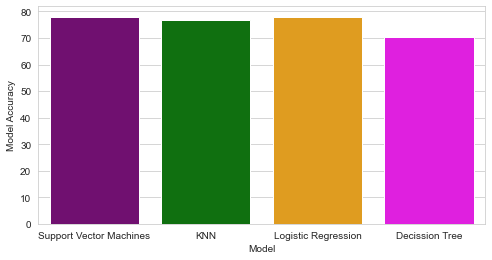

In [53]:
colors = ["purple", "green", "orange", "magenta","blue","black"]
sns.set_style("whitegrid")
plt.figure(figsize=(8,4))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Model Accuracy'], palette=colors )
plt.show()

# Final Prediction

In [58]:
# Make predictions on unseen data, here i have given random values for each features in the input_data
# take the data  and store in the variable 
input_data = (2,95,90,40,150,24,0.727000,20,55,30,60,0.5434,80)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data) # converting this list into numpy array

# reshape the numpy array as we are predicting for one instance

input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

[[  2.      95.      90.      40.     150.      24.       0.727   20.
   55.      30.      60.       0.5434  80.    ]]


In [60]:
# predict
predictions = logic.predict(input_data_reshaped)
print(predictions)
if predictions[0] == 1:
    print("The patient is predicted to have heart disease.")
else:
    print("The patient is predicted to not have heart disease.")

[1.]
The patient is predicted to have heart disease.
